In [4]:
!pip install pyeasyga

import random
from pyeasyga import pyeasyga
import matplotlib.pyplot as plt

0 {'name': 'green', 'value': 4, 'weight': 12}
1 {'name': 'gray', 'value': 2, 'weight': 1}
1 {'name': 'yellow', 'value': 10, 'weight': 4}
1 {'name': 'orange', 'value': 1, 'weight': 1}
0 {'name': 'blue', 'value': 2, 'weight': 2}
0 {'name': 'green', 'value': 4, 'weight': 12}
1 {'name': 'gray', 'value': 2, 'weight': 1}
1 {'name': 'yellow', 'value': 10, 'weight': 4}
0 {'name': 'orange', 'value': 1, 'weight': 1}
0 {'name': 'blue', 'value': 2, 'weight': 2}
0 {'name': 'green', 'value': 4, 'weight': 12}
0 {'name': 'gray', 'value': 2, 'weight': 1}
1 {'name': 'yellow', 'value': 10, 'weight': 4}
1 {'name': 'orange', 'value': 1, 'weight': 1}
0 {'name': 'blue', 'value': 2, 'weight': 2}
0 {'name': 'green', 'value': 4, 'weight': 12}
1 {'name': 'gray', 'value': 2, 'weight': 1}
1 {'name': 'yellow', 'value': 10, 'weight': 4}
0 {'name': 'orange', 'value': 1, 'weight': 1}
1 {'name': 'blue', 'value': 2, 'weight': 2}
[13, 12, 11, 14]
0 {'name': 'green', 'value': 4, 'weight': 12}
1 {'name': 'gray', 'value': 2

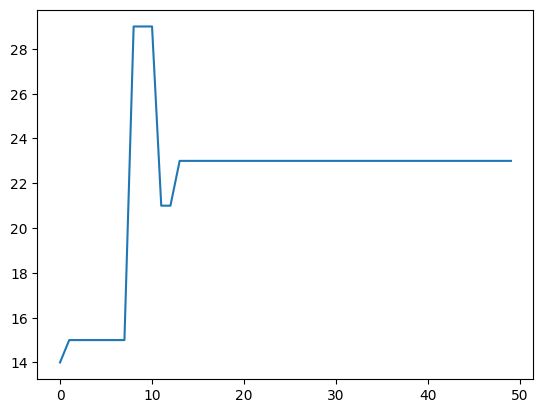

In [10]:
# setup data
data = [{'name': 'green', 'value': 4, 'weight': 12},
        {'name': 'gray', 'value': 2, 'weight': 1},
        {'name': 'yellow', 'value': 10, 'weight': 4},
        {'name': 'orange', 'value': 1, 'weight': 1},
        {'name': 'blue', 'value': 2, 'weight': 2}]

tamanho_populacao = 4

ga = pyeasyga.GeneticAlgorithm(data, population_size=tamanho_populacao,
                               generations=50,
                               crossover_probability=0.9,
                               mutation_probability=0.1,
                               elitism = False,
                               maximise_fitness=True
                               )

cont = 0
aptidoes_por_geracao = []
melhor_por_geracao = []

# define a fitness function
def aptidao(individual, data):
    global cont
    cont += 1
    #print("individual", individual)
    values, weights = 0, 0
    for gene, box in zip(individual, data):
        print(gene, box)
        # if gene == 1:
        values += gene * box['value']
        weights += gene * box['weight']
    if weights > 15:
        values = 0
    #print(values)
    #print()
    aptidoes_por_geracao.append(values)
    if(cont >= tamanho_populacao):
      print(aptidoes_por_geracao)
      melhor_por_geracao.append( max(aptidoes_por_geracao) )
      aptidoes_por_geracao.clear()
      cont = 0
    return values

ga.fitness_function = aptidao

# Custom mutation function to allow repetition
def custom_mutate(individual):
    mutation_index = random.randrange(len(individual))
    individual[mutation_index] = random.randint(0, 15 // data[mutation_index]['weight'])  # Permite múltiplas repetições
    return individual

ga.mutate_function = custom_mutate

ga.run()
print(ga.best_individual())
plt.plot(melhor_por_geracao)
plt.savefig('graph.jpg')